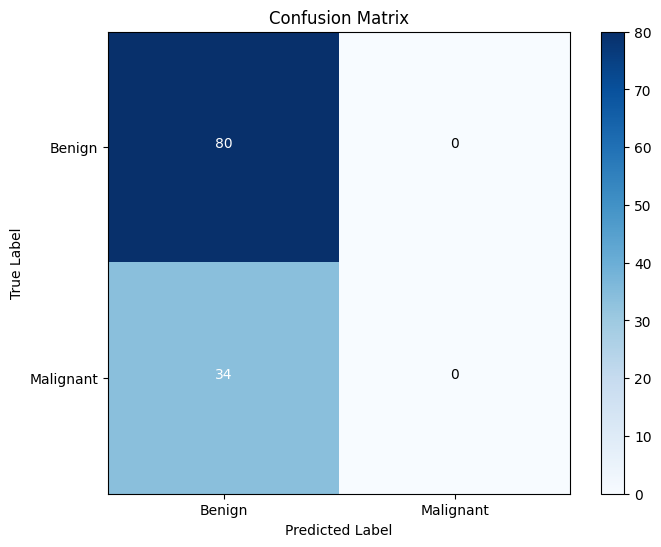

Training Time: 0.05 seconds
Accuracy: 0.70
Sensitivity (Recall) for Malignant: 0.00
Sensitivity (Recall) for Benign: 1.00
Confusion Matrix:
[[80  0]
 [34  0]]


In [2]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Preprocess the data if needed
df_cleaned = df.dropna()

# Split features and target variable
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the Support Vector Machine (Polynomial) Classifier and track the training time
start_time = time.time()
model = SVC(kernel='poly')
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the testing set
predictions = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, predictions)
sensitivity = recall_score(y_test, predictions, pos_label="M")
specificity = recall_score(y_test, predictions, pos_label="B")
cm = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Benign', 'Malignant']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i][j]), horizontalalignment='center', color='white' if cm[i][j] > 0.5 else 'black')
plt.show()

# Print performance metrics
print(f"Training Time: {training_time:.2f} seconds")
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall) for Malignant: {sensitivity:.2f}")
print(f"Sensitivity (Recall) for Benign: {specificity:.2f}")
print(f"Confusion Matrix:\n{cm}")
